In [61]:
import pandas as pd
import statsmodels.api as sm
import dtale as dt
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns


In [45]:
%matplotlib inline

In [194]:
preprocessed_adoption_survey = catalog.load('preprocessed_adoption_survey')
preprocessed_yield_2019 = catalog.load('preprocessed_yield_2019')
preprocessed_yield_2018 = catalog.load('preprocessed_yield_2018')

2021-11-23 23:03:17,800 - kedro.io.data_catalog - INFO - Loading data from `preprocessed_adoption_survey` (CSVDataSet)...
2021-11-23 23:03:17,822 - kedro.io.data_catalog - INFO - Loading data from `preprocessed_yield_2019` (CSVDataSet)...
2021-11-23 23:03:17,835 - kedro.io.data_catalog - INFO - Loading data from `preprocessed_yield_2018` (CSVDataSet)...


In [195]:
preprocessed_yield_2019 = preprocessed_yield_2019[~preprocessed_yield_2019['yield'].isna() & ~preprocessed_yield_2019['crop'].isna()]
dt.show(preprocessed_yield_2019)

In [196]:
pp_yield_beans = preprocessed_yield_2019[preprocessed_yield_2019['crop'] == 'beans']
pp_yield_beans['yield'] = (pp_yield_beans['yield'] - pp_yield_beans['yield'].mean()) / pp_yield_beans['yield'].std()

In [197]:
pp_yield_maize = preprocessed_yield_2019[preprocessed_yield_2019['crop'] == 'maize']
pp_yield_maize['yield'] = (pp_yield_maize['yield'] - pp_yield_maize['yield'].mean()) / pp_yield_maize['yield'].std()

In [198]:
dt.show(preprocessed_adoption_survey_std)

In [199]:
dt.show(pp_yield_beans)

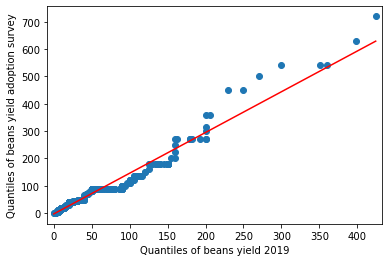

In [200]:
ax2 = preprocessed_yield_2019[preprocessed_yield_2019['crop'] == 'beans'].dropna(subset=['yield'])
ax2 = ax2[np.abs(stats.zscore(ax2['yield'])) < 4]['yield']
ax1 = preprocessed_adoption_survey.dropna(subset=['hvstbeans'])
ax1 = ax1[np.abs(stats.zscore(ax1['hvstbeans'])) < 4]['hvstbeans']
fig = sm.qqplot_2samples(ax1, ax2, line='r')
plt.xlabel("Quantiles of beans yield 2019")
plt.ylabel("Quantiles of beans yield adoption survey")
plt.savefig("plots/qq_beans_yield_adoption_survey.png")


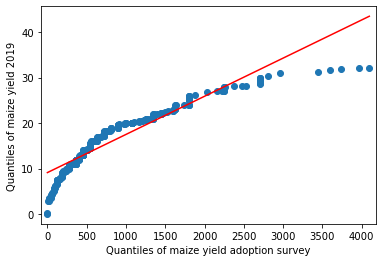

In [201]:
ax1 = preprocessed_adoption_survey.dropna(subset=['hvstmaize'])
ax2 = preprocessed_yield_2019[preprocessed_yield_2019['crop'] == 'maize'].dropna(subset=['yield'])
ax1 = ax1[np.abs(stats.zscore(ax1['hvstmaize'])) < 3]['hvstmaize']
ax2 = ax2[np.abs(stats.zscore(ax2['yield'])) < 3]['yield']

sm.qqplot_2samples(ax1, ax2, line='r')
plt.xlabel("Quantiles of maize yield adoption survey")
plt.ylabel("Quantiles of maize yield 2019")
plt.savefig("plots/qq_maize_yield_adoption_survey.png")

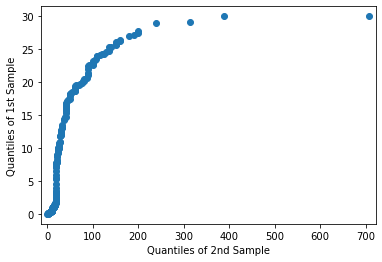

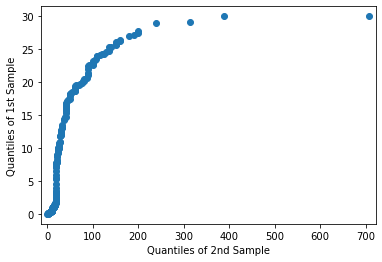

In [202]:
ax1 = preprocessed_yield_2018['yield'].dropna()
ax2 = preprocessed_yield_2019['yield'].dropna()
sm.qqplot_2samples(ax1, ax2)

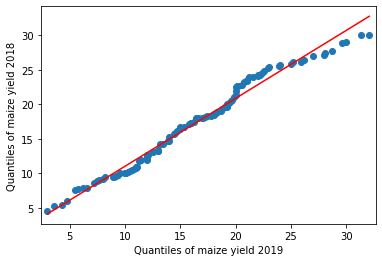

In [203]:
ax1 = preprocessed_yield_2018[preprocessed_yield_2018['crop'] == 'maize'].dropna(subset=['yield'])
ax2 = preprocessed_yield_2019[preprocessed_yield_2019['crop'] == 'maize'].dropna(subset=['yield'])
sm.qqplot_2samples(ax1['yield'], ax2['yield'], line = 'r')
plt.xlabel("Quantiles of maize yield 2019")
plt.ylabel("Quantiles of maize yield 2018")
plt.savefig("plots/qq_maize_yield_2018_2019.png")

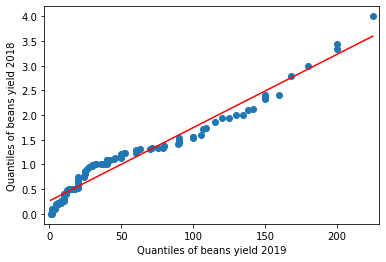

In [204]:
ax1 = preprocessed_yield_2018[preprocessed_yield_2018['crop'] == 'beans'].dropna(subset=['yield'])
ax2 = preprocessed_yield_2019[preprocessed_yield_2019['crop'] == 'beans'].dropna(subset=['yield'])
ax1 = ax1[np.abs(stats.zscore(ax1['yield'])) < 2]['yield']
ax2 = ax2[np.abs(stats.zscore(ax2['yield'])) < 2]['yield']
sm.qqplot_2samples(ax1, ax2, line ='r')
plt.xlabel("Quantiles of beans yield 2019")
plt.ylabel("Quantiles of beans yield 2018")
plt.savefig("plots/qq_beans_yield_2018_2019.png")

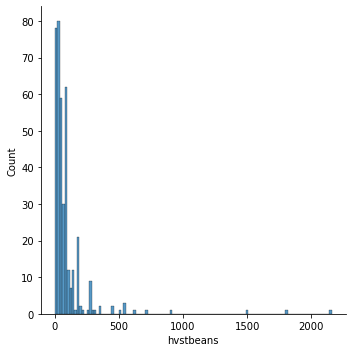

In [205]:
sns.displot(preprocessed_adoption_survey['hvstbeans'].dropna() )

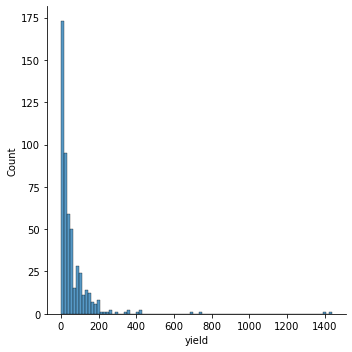

In [206]:
sns.displot(preprocessed_yield_2019[preprocessed_yield_2019['crop'] == 'beans']['yield'].dropna())

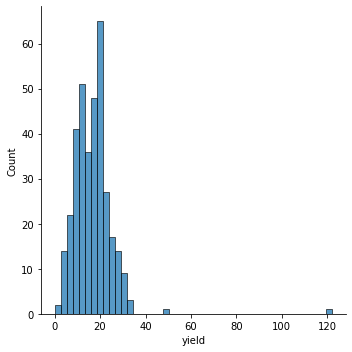

In [207]:
sns.displot(preprocessed_yield_2019[preprocessed_yield_2019['crop'] == 'maize']['yield'].dropna())

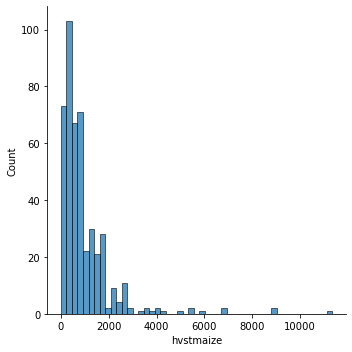

In [208]:
sns.displot(preprocessed_adoption_survey['hvstmaize'].dropna())